# Case 3. Data analysis and first classification experiments
Cognitive Systems for Health Technology Applications<br>
1.3.2019, Sakari Lukkarinen<br>
[Helsinki Metropolia University of Applied Sciences](www.metropolia.fi/en)

## Introduction

The aim of this Notebook is to get familiar with the case 3 dataset by exploring it with pandas library. In addition it works as introduction to text preprocessing functions.

## Acknowledgments

Several of the ideas are based on [Team NDL: Algorithms and Illnesses](https://www.kaggle.com/neilash/team-ndl-algorithms-and-illnesses).
The dataset is from: [UCI ML Drug Review dataset](https://www.kaggle.com/jessicali9530/kuc-hackathon-winter-2018).

## Data exploration

In [1]:
# Read the basic libraries (similar start as in Kaggle kernels)
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the "../input/" directory.
import os
print(os.listdir("../input"))

['drugsComTrain_raw.csv', 'drugsComTest_raw.csv']


In [2]:
# Create dataframes train and test
train = pd.read_csv('../input/drugsComTrain_raw.csv')
test = pd.read_csv('../input/drugsComTest_raw.csv')

In [3]:
# Show the first 5 rows of the train set
train.head()

,uniqueID,drugName,condition,review,rating,date,usefulCount
0,206461,Valsartan,Left Ventricular Dysfunction,"""It has no side effect, I take it in combinati...",9,20-May-12,27
1,95260,Guanfacine,ADHD,"""My son is halfway through his fourth week of ...",8,27-Apr-10,192
2,92703,Lybrel,Birth Control,"""I used to take another oral contraceptive, wh...",5,14-Dec-09,17
3,138000,Ortho Evra,Birth Control,"""This is my first time using any form of birth...",8,3-Nov-15,10
4,35696,Buprenorphine / naloxone,Opiate Dependence,"""Suboxone has completely turned my life around...",9,27-Nov-16,37


In [4]:
# Show the first 5 rows of the test set
test.head()

,uniqueID,drugName,condition,review,rating,date,usefulCount
0,163740,Mirtazapine,Depression,"""I&#039;ve tried a few antidepressants over th...",10,28-Feb-12,22
1,206473,Mesalamine,"Crohn's Disease, Maintenance","""My son has Crohn&#039;s disease and has done ...",8,17-May-09,17
2,159672,Bactrim,Urinary Tract Infection,"""Quick reduction of symptoms""",9,29-Sep-17,3
3,39293,Contrave,Weight Loss,"""Contrave combines drugs that were used for al...",9,5-Mar-17,35
4,97768,Cyclafem 1 / 35,Birth Control,"""I have been on this birth control for one cyc...",9,22-Oct-15,4


In [5]:
# Column names
list(train)

['uniqueID',
 'drugName',
 'condition',
 'review',
 'rating',
 'date',
 'usefulCount']

In [6]:
# Are the columns same in train and test sets?
list(train) == list(test)

True

In [7]:
# How many rows are there in train and test sets?
rows_train = train.values.shape[0]
rows_test = test.values.shape[0]
print('Rows in train set:', rows_train)
print('Rows in test set:', rows_test)

# What is the ratio of the train and test set sizes?
ratio = rows_train/rows_test
print('Ratio (train:test) = {:.3f}'.format(ratio))

Rows in train set: 161297
Rows in test set: 53766
Ratio (train:test) = 3.000


In [8]:
# How many unique medical conditions there are?
train['condition'].unique().size, test['condition'].unique().size

(885, 709)

In [9]:
# How many drug names there are?
train['drugName'].unique().size, test['drugName'].unique().size

(3436, 2637)

In [10]:
# What are the most common medical conditions?
conditions = train['condition'].value_counts().sort_values(ascending=False)
conditions[:10]

Birth Control      28788
Depression          9069
Pain                6145
Anxiety             5904
Acne                5588
Bipolar Disorde     4224
Insomnia            3673
Weight Loss         3609
Obesity             3568
ADHD                3383
Name: condition, dtype: int64

In [11]:
# Prepare for plotting
from matplotlib import pyplot, pylab
plt = pyplot
%matplotlib inline

In [12]:
# Change the default figure size
plt.rcParams['figure.figsize'] = [12, 8]

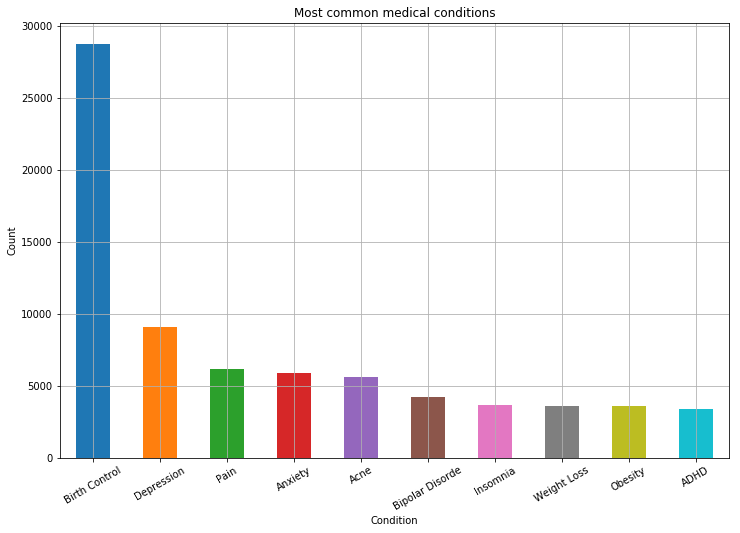

In [13]:
# Plot the most common medical conditions as a bar plot
conditions[:10].plot(kind='bar', rot = 30)
plt.title('Most common medical conditions')
plt.xlabel('Condition')
plt.ylabel('Count')
plt.grid()
plt.show()

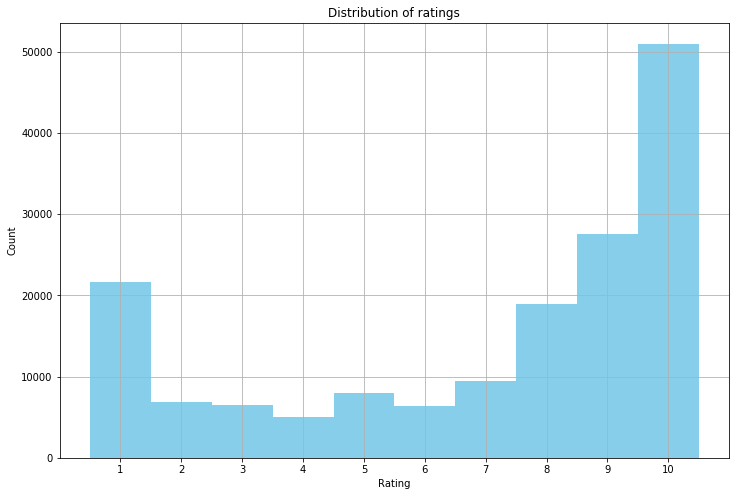

In [14]:
# How are the ratings distributed?
train['rating'].hist(color='skyblue', bins = range(1, 12), align = 'left')
plt.title('Distribution of ratings')
plt.xlabel('Rating')
plt.ylabel('Count')
plt.xticks(range(1, 11))
plt.show()

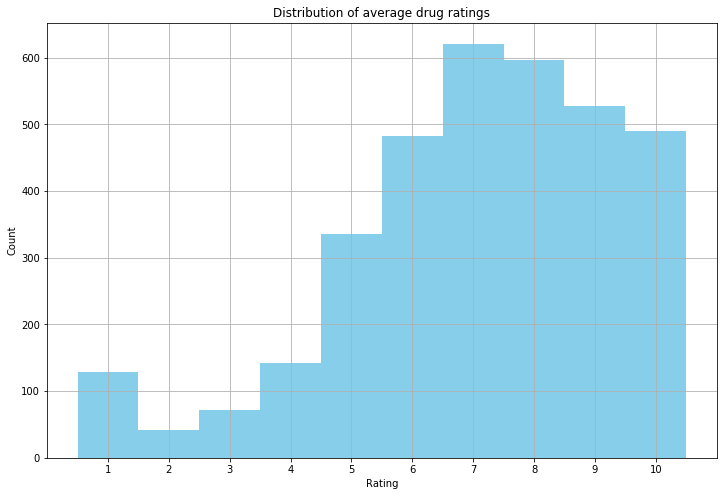

In [15]:
# What is the average rating grouped by the drug name?
rating_avgs = (train['rating'].groupby(train['drugName']).mean())
rating_avgs.hist(color='skyblue', bins = range(1, 12), align = 'left')
plt.title('Distribution of average drug ratings')
plt.xlabel('Rating')
plt.ylabel('Count')
plt.xticks(range(1, 11))
plt.show()

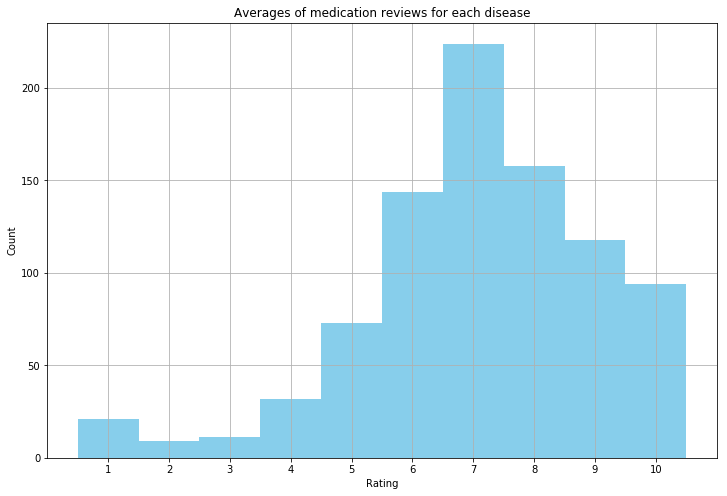

In [16]:
# What is the average rating grouped by the condition?
rating_avgs = (train['rating'].groupby(train['condition']).mean())
rating_avgs.hist(color='skyblue', bins = range(1, 12), align = 'left')
plt.title('Averages of medication reviews for each disease')
plt.xlabel('Rating')
plt.ylabel('Count')
plt.xticks(range(1, 11))
plt.show()

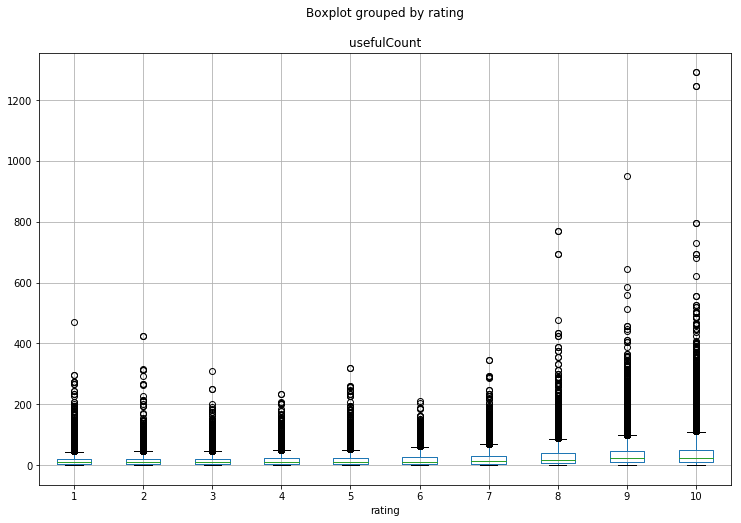

In [17]:
# How the usefullness is distributed by rating?
boxplot = train.boxplot(column = 'usefulCount',by = 'rating')

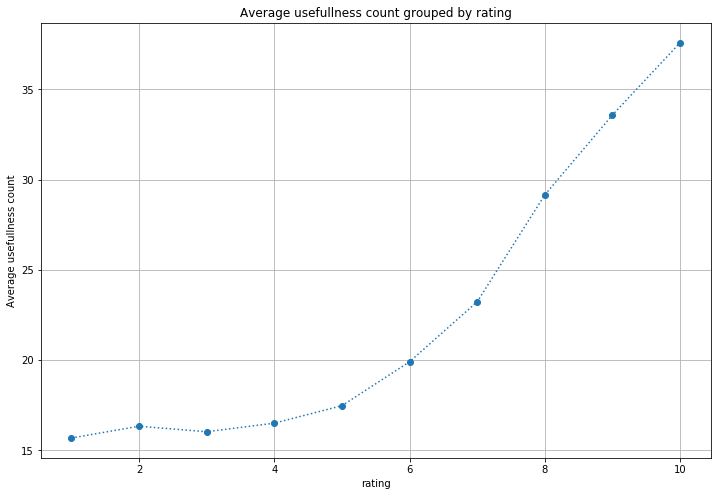

In [18]:
# What is the average usefullness count by rating?
train.groupby('rating')['usefulCount'].mean().plot(style = 'o:')
plt.ylabel('Average usefullness count')
plt.title('Average usefullness count grouped by rating')
plt.grid()
plt.show()

In [19]:
# What were the most useful reviews?
useful_train = train.sort_values(by='usefulCount', ascending=False)
useful_train.iloc[:10]

,uniqueID,drugName,condition,review,rating,date,usefulCount
6716,96616,Sertraline,Depression,"""I remember reading people&#039;s opinions, on...",10,31-Jul-08,1291
33552,119152,Zoloft,Depression,"""I remember reading people&#039;s opinions, on...",10,31-Jul-08,1291
21708,131116,Levonorgestrel,Birth Control,"""I have had my IUD for over a year now and I t...",10,1-Apr-09,1247
4249,182560,Mirena,Birth Control,"""I have had my IUD for over a year now and I t...",10,1-Apr-09,1247
146145,119151,Zoloft,Depression,"""I&#039;ve been on Zoloft 50mg for over two ye...",9,5-Aug-08,949
58608,139141,Phentermine,Weight Loss,"""I have used this pill off and on for the past...",10,19-Oct-08,796
16889,52305,Adipex-P,Weight Loss,"""I have used this pill off and on for the past...",10,19-Oct-08,796
2039,62757,Citalopram,Depression,"""I responded after one week. The side effects ...",8,25-Mar-08,771
152838,89825,Celexa,Depression,"""I responded after one week. The side effects ...",8,25-Mar-08,771
5218,107655,Implanon,Birth Control,"""I was very nervous about trying Implanon afte...",10,19-Jul-10,730


In [20]:
# Print top 5 most useful reviews
for r in useful_train.review.iloc[:5]:
    print(r, '\n')

"I remember reading people&#039;s opinions, online, of the drug before I took it and it scared me away from it. Then I finally decided to give it a try and it has been the best choice I have made. I have been on it for over 4 months and I feel great. I&#039;m on 100mg and I don&#039;t have any side effects. When I first started I did notice that my hands would tremble but then it subsided. So honestly, don&#039;t listen to all the negativity because what doesn&#039;t work for some works amazing for others. So go based on youself and not everyone else. It may be a blessing in diguise. The pill is not meant to make you be all happy go lucky and see &quot;butterflies and roses&quot;, its meant to help put the chemicals in your mind in balance so you can just be who you are and not overly depressed. I still get sad some times, but that is normal, that is life, and it&#039;s up to people to take control to make a change. I did so by getting on this pill." 

"I remember reading people&#039;s

In [21]:
# Print5 of the least useful reviews
for r in useful_train.review.iloc[-5:]:
    print(r, '\n')

"It only burns when putting on after shaving or in excessive amounts. I have been using it for years and only need to apply it about once a month to keep armpits from having an odor. I do not ever sweat anymore. So glad I bought this product" 

"I was on imipramine for a little over a year, after trying every other antidepressant known to man. At first I noticed a major change. It was the  best I had felt in years. I was back to doing things that I used to do and felt great. It also helped me to sleep at night. The effects of the med started to decrease so we increased the dose until I was eventually on 100mg a day. That&#039;s when the side effect started. I went in for a routine doctor visit and my resting heart rate was 130. Of course panic set in and I had a bunch of tests ran on my heart, everything was normal. The only thing different was the increase in imiprimine. It caused me tachycardia.  So now I am in the process of weaning off of it. Onto something else." 

"I received Imp

In [22]:
# Import natural language processing toolkit
import nltk

# Use the VADER sentiment analysis tools.
# Ref. Hutto, C.J. & Gilbert, E.E. (2014). VADER: A Parsimonious Rule-based Model for Sentiment Analysis of Social Media Text. 
# Eighth International Conference on Weblogs and Social Media (ICWSM-14). Ann Arbor, MI, June 2014.
# http://www.nltk.org/api/nltk.sentiment.html
from nltk.sentiment.vader import SentimentIntensityAnalyzer

In [23]:
# Analyze the sentiment polarity of each review with scale -1.0 ... +1.0
# Takes a long time...
sid = SentimentIntensityAnalyzer()
sentiments = []
for r in train['review']:
    sentiments.append(sid.polarity_scores(r).get('compound')) 
sentiments = np.asarray(sentiments)

In [24]:
# Check the first 10 values
sentiments[:10]

array([-0.296 ,  0.8603,  0.7645,  0.7184,  0.9403, -0.4342,  0.    ,
       -0.9468, -0.5593, -0.901 ])

In [25]:
# Add the sentiment polarity analysis to dataframe
useful_train['sentiment'] = pd.Series(data=sentiments)

# Reset the indexing and display the first 5 rows
useful_train = useful_train.reset_index(drop=True)
useful_train.head()

,uniqueID,drugName,condition,review,rating,date,usefulCount,sentiment
0,96616,Sertraline,Depression,"""I remember reading people&#039;s opinions, on...",10,31-Jul-08,1291,0.9772
1,119152,Zoloft,Depression,"""I remember reading people&#039;s opinions, on...",10,31-Jul-08,1291,0.9772
2,131116,Levonorgestrel,Birth Control,"""I have had my IUD for over a year now and I t...",10,1-Apr-09,1247,0.7739
3,182560,Mirena,Birth Control,"""I have had my IUD for over a year now and I t...",10,1-Apr-09,1247,0.7739
4,119151,Zoloft,Depression,"""I&#039;ve been on Zoloft 50mg for over two ye...",9,5-Aug-08,949,-0.6815


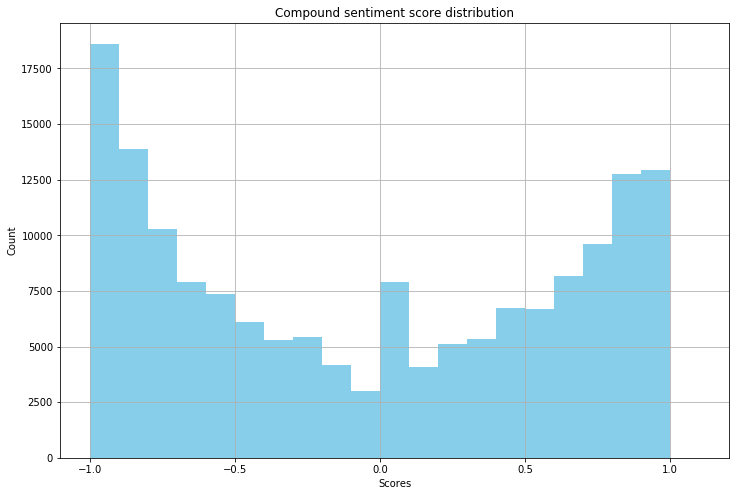

In [40]:
# What is the distribution of the sentiment polarity results?
useful_train['sentiment'].hist(color='skyblue', bins = np.arange(-1.0, 1.2, 0.1), align = 'mid')
plt.title('Compound sentiment score distribution')
plt.xlabel('Scores')
plt.ylabel('Count')
plt.show()

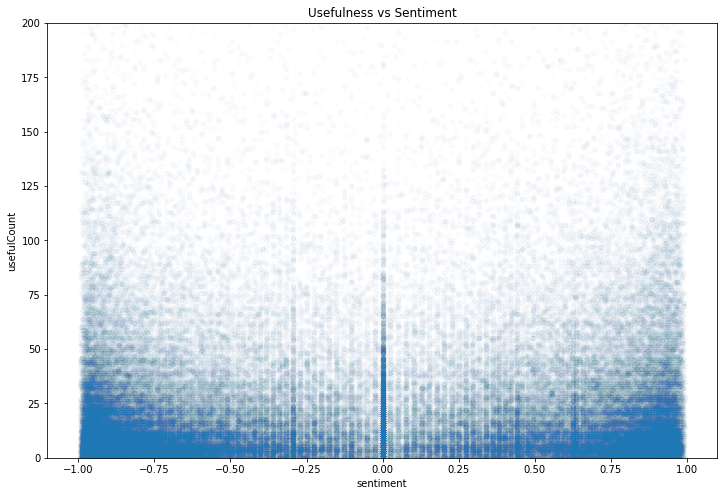

In [41]:
# how is the usefullness varies vs. sentiment score?
useful_train.plot(x = 'sentiment', y = 'usefulCount', kind = 'scatter', alpha = 0.01)
plt.title('Usefulness vs Sentiment')
plt.ylim(0, 200)
plt.show()

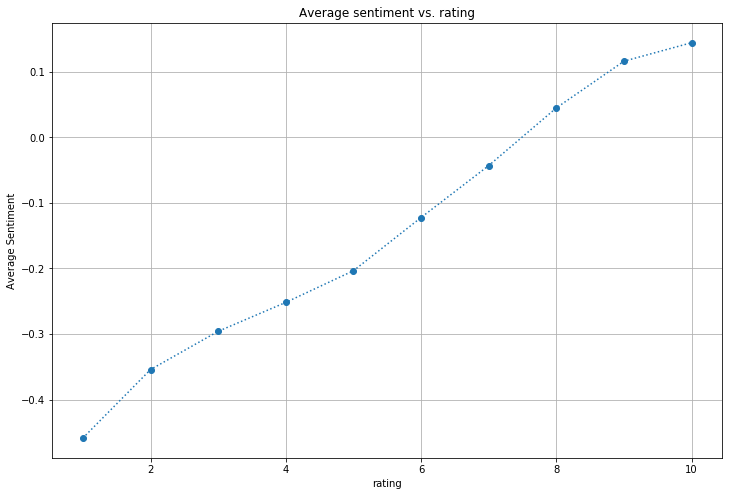

In [42]:
# What is the average sentiment vs. rating?
useful_train.groupby('rating')['sentiment'].mean().plot(style = 'o:')
plt.ylabel('Average Sentiment')
plt.title('Average sentiment vs. rating')
plt.grid()
plt.show()

## Classification with scikit-learn

In [43]:
# Import libraries
import time
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics import confusion_matrix
from sklearn.naive_bayes import MultinomialNB
from sklearn.ensemble import RandomForestClassifier

In [45]:
# Creates TF-IDF vectorizer and transforms the corpus
vectorizer = TfidfVectorizer()
X_train = vectorizer.fit_transform(train['review'].iloc[:10000])

# transforms test reviews to above vectorized format
X_test = vectorizer.transform(test['review'].iloc[:5000])

In [48]:
# Create a column with binary rating indicating the polarity of a review
train['binary_rating'] = train['rating'] > 5
y_train_rating = train['binary_rating'].iloc[:10000]

test['binary_rating'] = test.rating > 5
y_test_rating = test['binary_rating'].iloc[:5000]

In [49]:
# Use Naive Bayes classifier
clf = MultinomialNB().fit(X_train, y_train_rating)

# Evaluate the model
pred = clf.predict(X_test)

print("Accuracy: {:.3f}".format(clf.score(X_test, y_test_rating)))
print("Confusion Matrix")
print(confusion_matrix(pred, y_test_rating))

Accuracy: 0.702
Confusion Matrix
[[  18    1]
 [1489 3492]]


In [50]:
# Use random forest classifier
start = time.time()
rfc_rating = RandomForestClassifier(n_estimators = 100, random_state = 42, max_depth = 10000, min_samples_split = 0.001)
rfc_rating.fit(X_train, y_train_rating)
end = time.time()
print("Training time: {:.0f} seconds.".format(end-start))

# Evaluate the model
pred = rfc_rating.predict(X_test)

print("Accuracy: {:.3f}".format(rfc_rating.score(X_test, y_test_rating)))
print("Confusion Matrix")
print(confusion_matrix(pred, y_test_rating))

Training time: 8 seconds.
Accuracy: 0.747
Confusion Matrix
[[ 275   31]
 [1232 3462]]


## Classification Using keras

More info: 
- [scikit-learn CountVectorizer](https://scikit-learn.org/stable/modules/generated/sklearn.feature_extraction.text.CountVectorizer.html)
- [scikit-learn text feature extraction](https://scikit-learn.org/stable/modules/feature_extraction.html#text-feature-extraction)
- [keras Tokenizer]()


In [75]:
from keras.preprocessing.text import Tokenizer

samples = train['review'].iloc[:15000]
tokenizer = Tokenizer(num_words = 5000)
tokenizer.fit_on_texts(samples)

word_index = tokenizer.word_index
print('Found %s unique tokens.' % len(word_index))

Found 20153 unique tokens.


In [76]:
# Make one hot samples
data = tokenizer.texts_to_matrix(samples, mode='binary')
data.shape

(15000, 5000)

In [77]:
# Show the first data row
data[:1]

array([[0., 1., 1., ..., 0., 0., 0.]])

In [80]:
# Create binary labels:
# label = 1, when rating > 5
# label = 0, otherwise
labels = 1.0*(train['rating'].iloc[:15000].values > 5)
labels[:10]

array([1., 1., 0., 1., 1., 0., 0., 1., 0., 1.])

In [81]:
# Split into training and validation sets
from sklearn.model_selection import train_test_split
x_train, x_val, y_train, y_val = train_test_split(data, labels, test_size = 0.333, random_state = 2019)

In [82]:
# Create a simple sequential model
from keras.models import Sequential
from keras.layers import Dense, Activation

model = Sequential()
model.add(Dense(256, input_dim = 5000))
model.add(Activation('relu'))
model.add(Dense(32))
model.add(Activation('relu'))
model.add(Dense(1))
model.add(Activation('sigmoid'))
model.compile(optimizer = 'rmsprop', loss = 'binary_crossentropy', metrics = ['acc'])
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_16 (Dense)             (None, 256)               1280256   
_________________________________________________________________
activation_13 (Activation)   (None, 256)               0         
_________________________________________________________________
dense_17 (Dense)             (None, 32)                8224      
_________________________________________________________________
activation_14 (Activation)   (None, 32)                0         
_________________________________________________________________
dense_18 (Dense)             (None, 1)                 33        
_________________________________________________________________
activation_15 (Activation)   (None, 1)                 0         
Total params: 1,288,513
Trainable params: 1,288,513
Non-trainable params: 0
_________________________________________________________________


In [83]:
history = model.fit(x_train, y_train, 
                    epochs = 10, 
                    batch_size = 32,
                    verbose = 1,
                    validation_data = (x_val, y_val))

Train on 10005 samples, validate on 4995 samples
Epoch 1/10
10005/10005 [==============================] - 14s 1ms/step - loss: 0.4675 - acc: 0.7876 - val_loss: 0.4570 - val_acc: 0.7974
Epoch 2/10
10005/10005 [==============================] - 11s 1ms/step - loss: 0.3222 - acc: 0.8708 - val_loss: 0.4567 - val_acc: 0.8066
Epoch 3/10
10005/10005 [==============================] - 12s 1ms/step - loss: 0.2201 - acc: 0.9171 - val_loss: 0.5695 - val_acc: 0.8082
Epoch 4/10
10005/10005 [==============================] - 12s 1ms/step - loss: 0.1347 - acc: 0.9536 - val_loss: 0.6188 - val_acc: 0.8022
Epoch 5/10
10005/10005 [==============================] - 13s 1ms/step - loss: 0.0688 - acc: 0.9796 - val_loss: 0.8123 - val_acc: 0.8058
Epoch 6/10
10005/10005 [==============================] - 13s 1ms/step - loss: 0.0351 - acc: 0.9900 - val_loss: 1.0229 - val_acc: 0.8114
Epoch 7/10
10005/10005 [==============================] - 13s 1ms/step - loss: 0.0170 - acc: 0.9949 - val_loss: 1.2253 - val_acc:

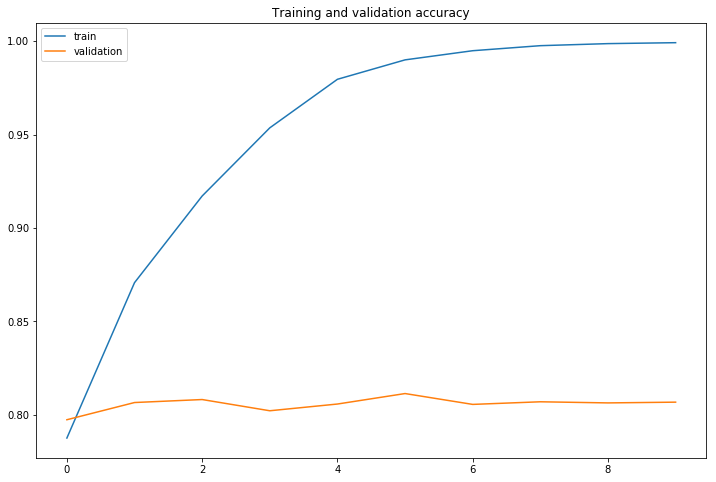

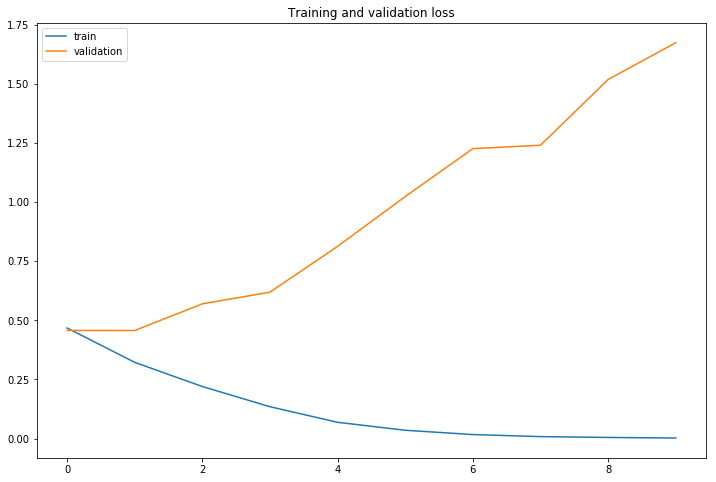

In [84]:
# Plot the accuracy and loss
acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']

plt.plot(acc, label = 'train')
plt.plot(val_acc, label = 'validation')
plt.title('Training and validation accuracy')
plt.legend()

plt.figure()

plt.plot(loss, label = 'train')
plt.plot(val_loss, label = 'validation')
plt.title('Training and validation loss')
plt.legend()

plt.show()